## Machin Learning works for the project

## Read data, split train and test set

In [294]:
library(dplyr)


In [295]:
df_data = read.csv("data_after_EDA.csv")

In [296]:
dim(df_data)

[1] 76092    38

In [297]:
names(df_data)

[1] "airconditioningtypeid"        "architecturalstyletypeid"    
 [3] "basementsqft"                 "bathroomcnt"                 
 [5] "bedroomcnt"                   "buildingqualitytypeid"       
 [7] "calculatedbathnbr"            "decktypeid"                  
 [9] "finishedfloor1squarefeet"     "calculatedfinishedsquarefeet"
[11] "finishedsquarefeet12"         "finishedsquarefeet15"        
[13] "finishedsquarefeet50"         "finishedsquarefeet6"         
[15] "fireplacecnt"                 "fullbathcnt"                 
[17] "garagecarcnt"                 "garagetotalsqft"             
[19] "hashottuborspa"               "heatingorsystemtypeid"       
[21] "lotsizesquarefeet"            "poolcnt"                     
[23] "poolsizesum"                  "pooltypeid10"                
[25] "pooltypeid2"                  "pooltypeid7"                 
[27] "propertylandusetypeid"        "roomcnt"                     
[29] "threequarterbathnbr"          "typeconstructiontypeid"      
[31] "unitcnt"                      "yardbuildingsqft17"          
[33] "yardbuildingsqft26"           "yearbuilt"                   
[35] "numberofstories"              "fireplaceflag"               
[37] "logerror"                     "logerror_interval"

In [298]:
df_data$abs_logerror = abs(df_data$logerror)

In [299]:
dim(df_data)

[1] 76092    39

In [300]:
smp_size <- floor(0.7 * nrow(df_data))
set.seed(123)
train_ind <- sample(nrow(df_data), size = smp_size)
train <- df_data[train_ind, ]
test <- df_data[-train_ind, ]
rownames(train) <- seq(length=nrow(train))
rownames(test) <- seq(length=nrow(test))

In [301]:
dim(train)

[1] 53264    39

In [302]:
dim(test)

[1] 22828    39

## Regression Approaches on absolute logerror to find significant features that influence prediction accuracy

In [9]:
#fit a linear model using all features
rawlms = lm(abs_logerror~.-logerror-logerror_interval, data = train)

In [10]:
summary(rawlms)


Call:
lm(formula = abs_logerror ~ . - logerror - logerror_interval, 
    data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4160 -0.0520 -0.0328 -0.0001  4.3745 

Coefficients: (3 not defined because of singularities)
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   5.661e-01  9.296e-02   6.090 1.13e-09 ***
airconditioningtypeid        -1.975e-03  3.820e-04  -5.170 2.35e-07 ***
architecturalstyletypeid     -9.982e-04  3.434e-03  -0.291 0.771329    
basementsqft                  6.389e-05  2.912e-05   2.194 0.028246 *  
bathroomcnt                  -6.260e-03  2.244e-02  -0.279 0.780280    
bedroomcnt                   -7.134e-03  9.436e-04  -7.561 4.07e-14 ***
buildingqualitytypeid        -3.222e-03  5.136e-04  -6.274 3.55e-10 ***
calculatedbathnbr            -1.432e-02  2.301e-02  -0.622 0.533802    
decktypeid                    4.712e-05  1.197e-04   0.394 0.693887    
finishedfloor1squarefeet     -8.526e-06  1

In [407]:
praw = predict(rawlms, data = test)
mseraw = mean((praw[1]-test[,39])^2)
mseraw

[1] 0.0242081

In [122]:
#lasso and ridge regression using all features
library(glmnet)
library(methods)
grid = 10^seq(1,-3,length = 100)
x = data.matrix(train)
testm = data.matrix(test)

In [123]:
cvridge = cv.glmnet(x[,1:36],x[,39],alpha = 0, nfolds = 5)#alpha = 0 for ridge, use 5-fold cv
cvridge

In [186]:
p=predict(cvridge, testm[,1:36], s="lambda.min")

mseridge=mean((p-test[,39])^2)
mseridge

[1] 0.02368862

In [127]:
cvlasso = cv.glmnet(x[,1:36],x[,39],alpha = 1, nfolds = 5)#alpha = 1 for lasso, use 5-fold cv
cvlasso

$lambda
 [1] 1.063082e-02 9.686408e-03 8.825895e-03 8.041826e-03 7.327413e-03
 [6] 6.676466e-03 6.083347e-03 5.542919e-03 5.050501e-03 4.601829e-03
[11] 4.193015e-03 3.820519e-03 3.481115e-03 3.171862e-03 2.890083e-03
[16] 2.633336e-03 2.399397e-03 2.186241e-03 1.992022e-03 1.815056e-03
[21] 1.653811e-03 1.506891e-03 1.373023e-03 1.251048e-03 1.139908e-03
[26] 1.038642e-03 9.463717e-04 8.622987e-04 7.856944e-04 7.158955e-04
[31] 6.522973e-04 5.943490e-04 5.415487e-04 4.934390e-04 4.496032e-04
[36] 4.096617e-04 3.732685e-04 3.401084e-04 3.098941e-04 2.823639e-04
[41] 2.572795e-04 2.344235e-04 2.135980e-04 1.946225e-04 1.773328e-04
[46] 1.615790e-04 1.472248e-04 1.341457e-04 1.222286e-04 1.113702e-04
[51] 1.014763e-04 9.246146e-05 8.424744e-05 7.676313e-05 6.994370e-05
[56] 6.373010e-05 5.806849e-05 5.290985e-05 4.820948e-05 4.392669e-05
[61] 4.002436e-05 3.646871e-05 3.322893e-05 3.027696e-05 2.758724e-05
[66] 2.513646e-05 2.290341e-05 2.086873e-05 1.901481e-05 1.732559e-05
[71] 1.57864

In [187]:
p=predict(cvlasso, testm[,1:36], s="lambda.min")

mselasso=mean((p-test[,39])^2)
mselasso

[1] 0.02369163

In [130]:
#pcr regression
library(pls)


Attaching package: 'pls'

The following object is masked from 'package:stats':

    loadings



In [132]:
pcr.fit = pcr(abs_logerror~.-logerror-logerror_interval,data = train, validation = "CV")

In [133]:
summary(pcr.fit)

Data: 	X dimension: 53264 36 
	Y dimension: 53264 1
Fit method: svdpc
Number of components considered: 36

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           0.155    0.155   0.1549   0.1549   0.1547   0.1547   0.1546
adjCV        0.155    0.155   0.1549   0.1549   0.1547   0.1547   0.1546
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV      0.1544   0.1544   0.1544    0.1544    0.1544    0.1544    0.1544
adjCV   0.1544   0.1544   0.1544    0.1544    0.1544    0.1544    0.1544
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps  20 comps
CV       0.1542    0.1542    0.1541    0.1541    0.1541    0.1539    0.1539
adjCV    0.1542    0.1542    0.1541    0.1541    0.1541    0.1539    0.1539
       21 comps  22 comps  23 comps  24 comps  25 comps  26 comps  27 comps
CV       0.1539    0.1539    0.1538    0.1538    0.1538    0.1538    0.1538
adjCV    0.1539

In [303]:
#we using 31 components in pcr because it is the best result
pcr.pred = predict(pcr.fit, test, ncomp = 31)
msepcr=mean((pcr.pred-test[,39])^2)
msepcr

[1] 0.02368931

In [139]:
#however, we need to neglect pcr since we are dealing with a pratical problem, "blackbox" is not good 

In [164]:
#then we started with boosted regression method
#first try is gbm
#use cv to find the bess result of cross-validation iteration
#try different shinkage(learning rate)
#choose the one with least MSE into final training and get its predicting result

library(gbm)
newtrain = subset(train, select=-c(logerror, logerror_interval))
# train$abs_logerror = data.matrix(train$abs_logerror)
mygbm0.01 = gbm(abs_logerror~., data = newtrain,distribution = "gaussian",interaction.depth = 5, shrinkage = 0.01,
               n.trees = 500, cv.folds = 5)

mygbm0.01

gbm(formula = abs_logerror ~ ., distribution = "gaussian", data = newtrain, 
    n.trees = 500, interaction.depth = 5, shrinkage = 0.01, cv.folds = 5)
A gradient boosted model with gaussian loss function.
500 iterations were performed.
The best cross-validation iteration was 490.
There were 36 predictors of which 30 had non-zero influence.

,var,rel.inf
yearbuilt,yearbuilt,28.42674397
calculatedfinishedsquarefeet,calculatedfinishedsquarefeet,18.23273794
lotsizesquarefeet,lotsizesquarefeet,17.92131222
finishedsquarefeet12,finishedsquarefeet12,13.96856343
garagetotalsqft,garagetotalsqft,5.65695531
finishedsquarefeet6,finishedsquarefeet6,2.15300175
bedroomcnt,bedroomcnt,2.04901302
bathroomcnt,bathroomcnt,1.83155664
roomcnt,roomcnt,1.26222756
propertylandusetypeid,propertylandusetypeid,1.17869555


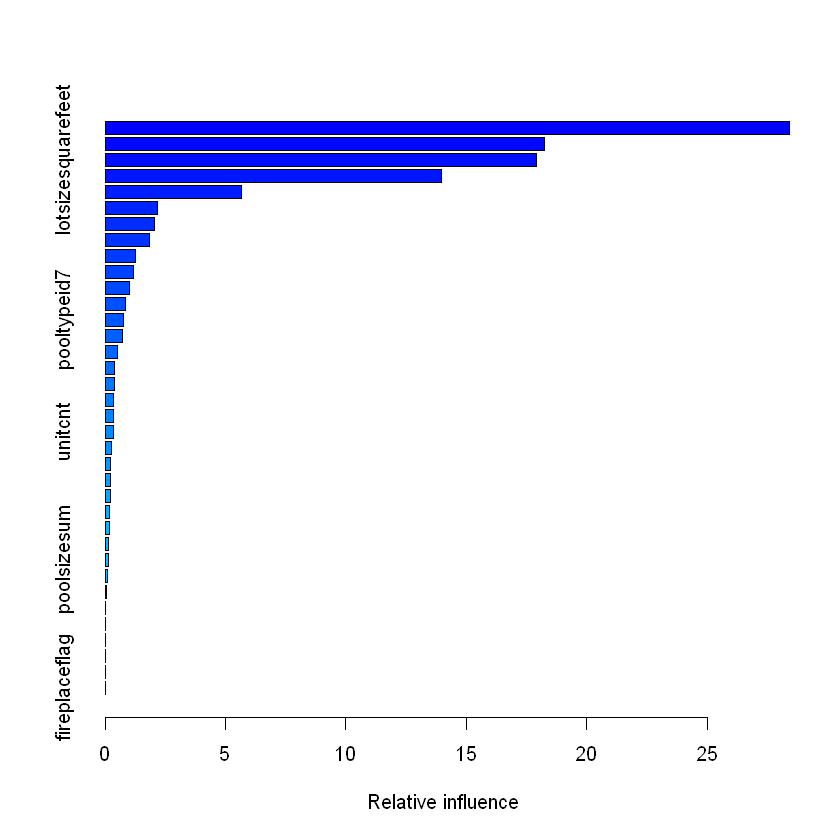

In [177]:
summary(mygbm0.01,n.trees=490)#best is 490 as illustrated

In [166]:
mygbm0.05 = gbm(abs_logerror~., data = newtrain,distribution = "gaussian",interaction.depth = 5, shrinkage = 0.05,
               n.trees = 500, cv.folds = 5)
mygbm0.05

gbm(formula = abs_logerror ~ ., distribution = "gaussian", data = newtrain, 
    n.trees = 500, interaction.depth = 5, shrinkage = 0.05, cv.folds = 5)
A gradient boosted model with gaussian loss function.
500 iterations were performed.
The best cross-validation iteration was 130.
There were 36 predictors of which 29 had non-zero influence.

In [167]:
mygbm0.1 =gbm(abs_logerror~., data = newtrain,distribution = "gaussian",interaction.depth = 5, shrinkage =0.1,
           n.trees= 500, cv.folds = 5)
mygbm0.1 

gbm(formula = abs_logerror ~ ., distribution = "gaussian", data = newtrain, 
    n.trees = 500, interaction.depth = 5, shrinkage = 0.1, cv.folds = 5)
A gradient boosted model with gaussian loss function.
500 iterations were performed.
The best cross-validation iteration was 62.
There were 36 predictors of which 24 had non-zero influence.

,var,rel.inf
yearbuilt,yearbuilt,24.61249024
calculatedfinishedsquarefeet,calculatedfinishedsquarefeet,18.56435819
lotsizesquarefeet,lotsizesquarefeet,17.33451921
finishedsquarefeet12,finishedsquarefeet12,14.12852549
garagetotalsqft,garagetotalsqft,6.37367992
finishedsquarefeet6,finishedsquarefeet6,3.41652272
pooltypeid7,pooltypeid7,2.45365534
bedroomcnt,bedroomcnt,2.27129164
propertylandusetypeid,propertylandusetypeid,1.24126002
bathroomcnt,bathroomcnt,1.22895952


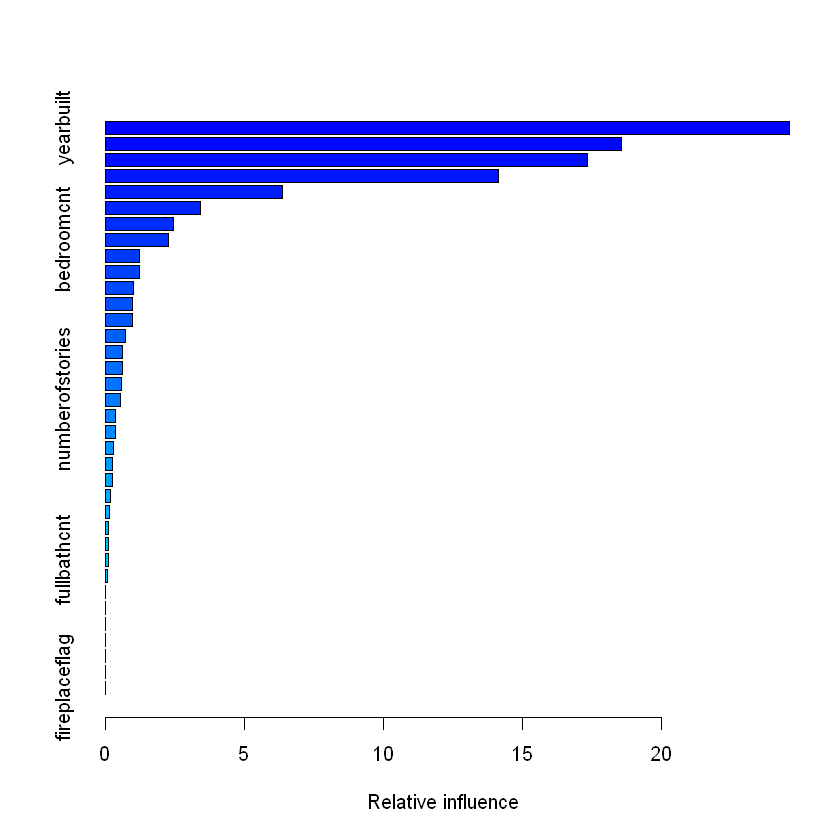

In [171]:
summary(mygbm0.05, n.trees = 130)

,var,rel.inf
yearbuilt,yearbuilt,25.1301199
calculatedfinishedsquarefeet,calculatedfinishedsquarefeet,19.9546182
lotsizesquarefeet,lotsizesquarefeet,17.4160654
finishedsquarefeet12,finishedsquarefeet12,16.8101825
garagetotalsqft,garagetotalsqft,6.0305058
finishedsquarefeet6,finishedsquarefeet6,2.8417025
bathroomcnt,bathroomcnt,2.2073735
propertylandusetypeid,propertylandusetypeid,1.2383840
calculatedbathnbr,calculatedbathnbr,1.0061899
finishedfloor1squarefeet,finishedfloor1squarefeet,0.9077185


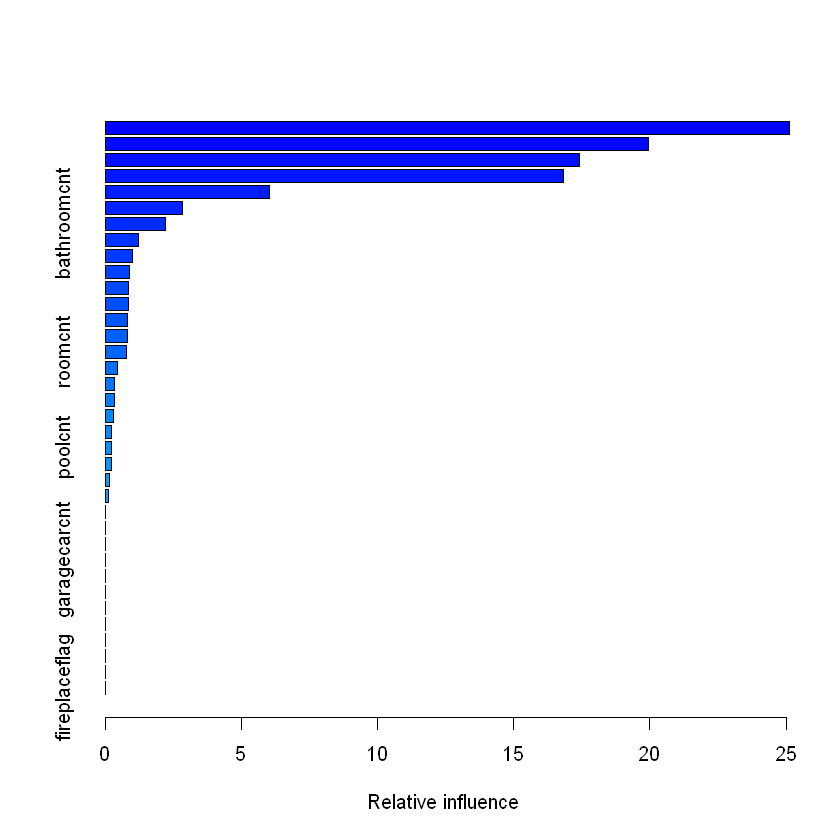

In [172]:
summary(mygbm0.1, n.trees = 62)

In [210]:
newtest = subset(test, select=-c(logerror, logerror_interval))
y0.1 = predict(mygbm0.1, newdata = newtest, n.trees = 62)
mse0.1 = mean((y0.1-test[,39])^2)
mse0.1

[1] 0.02347637

In [211]:
y0.05 = predict(mygbm0.05, newdata = newtest, n.trees =130)
mse0.05 = mean((y0.05-test[,39])^2)
mse0.05

[1] 0.02343749

In [212]:
y0.01 = predict(mygbm0.01, newdata = newtest, n.trees =490)
mse0.01 = mean((y0.01-test[,39])^2)
mse0.01

[1] 0.0234461

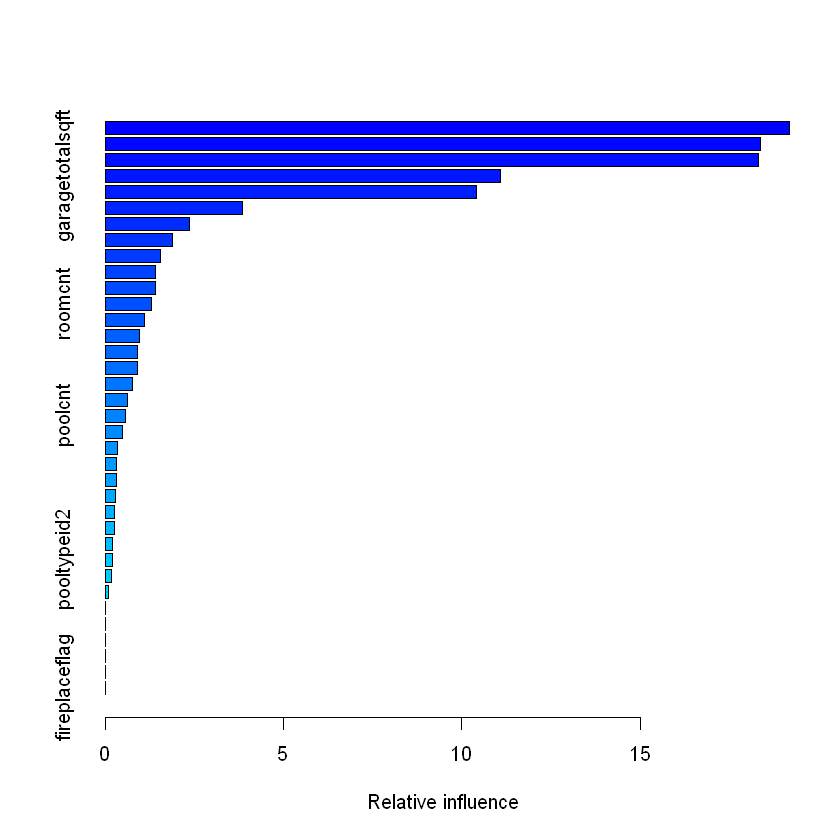

In [231]:
#we choosed 0.05 as the learning rate and get best result under number of tree = 130 for GBM
#and we want to find important factors in this model
s = summary(mygbm0.05)

In [255]:
library(dplyr)
gbm_feature = filter(s, rel.inf >1)
gbm_feature

var,rel.inf
calculatedfinishedsquarefeet,19.191077
yearbuilt,18.387639
lotsizesquarefeet,18.322248
garagetotalsqft,11.089830
finishedsquarefeet12,10.415506
finishedsquarefeet6,3.859242
bedroomcnt,2.372763
bathroomcnt,1.888719
finishedfloor1squarefeet,1.563438
buildingqualitytypeid,1.411611


In [193]:
#then we tried xgboosting
library(xgboost)
target = train$abs_logerror
dtrain = subset(train, select=-c(logerror, logerror_interval, abs_logerror))
dtest = subset(test, select=-c(logerror, logerror_interval, abs_logerror))
dtrain <- xgb.DMatrix(data.matrix(dtrain),label=target, missing=NA)
dtest <-xgb.DMatrix(data.matrix(dtest))

In [194]:
#use crossvalidation to select best shrikage parameter alpha
for (a in seq(0.02, 1, 0.02)){
param = list(booster = "gbtree", eta=0.05, max_depth = 5, min_child_weight = 100, objective = 'reg:linear',
             eval_metirc  =  'rmse', alpha = a)
    print(a)
xgb <- xgb.cv(params = param
                 , data = dtrain
                # , watchlist = list(train = dtrain)
                 , nrounds = 1
                 , verbose = 1
                 , print_every_n = 5
                 , nfold = 5)
}

[1] 0.02
[1]	train-rmse:0.437761+0.000205	test-rmse:0.437771+0.000821 
[1] 0.04
[1]	train-rmse:0.437760+0.000424	test-rmse:0.437772+0.001659 
[1] 0.06
[1]	train-rmse:0.437759+0.000377	test-rmse:0.437768+0.001411 
[1] 0.08
[1]	train-rmse:0.437760+0.000566	test-rmse:0.437770+0.002190 
[1] 0.1
[1]	train-rmse:0.437761+0.000449	test-rmse:0.437773+0.001774 
[1] 0.12
[1]	train-rmse:0.437761+0.000529	test-rmse:0.437767+0.002046 
[1] 0.14
[1]	train-rmse:0.437762+0.000329	test-rmse:0.437773+0.001268 
[1] 0.16
[1]	train-rmse:0.437761+0.000553	test-rmse:0.437770+0.002133 
[1] 0.18
[1]	train-rmse:0.437762+0.000541	test-rmse:0.437768+0.002089 
[1] 0.2
[1]	train-rmse:0.437763+0.000666	test-rmse:0.437763+0.002651 
[1] 0.22
[1]	train-rmse:0.437763+0.000394	test-rmse:0.437770+0.001540 
[1] 0.24
[1]	train-rmse:0.437763+0.000518	test-rmse:0.437769+0.002007 
[1] 0.26
[1]	train-rmse:0.437763+0.000393	test-rmse:0.437767+0.001504 
[1] 0.28
[1]	train-rmse:0.437765+0.000193	test-rmse:0.437775+0.000788 
[1] 0.3


In [217]:
#best alpha = 0.2
param = list(booster = "gbtree", eta=0.05, max_depth = 5, min_child_weight = 100, objective = 'reg:linear',
             eval_metirc  =  'rmse', alpha = 0.2)
xgb <- xgb.train(params = param
                 , data = dtrain
                # , watchlist = list(train = dtrain)
                 , nrounds = 100
                 , verbose = 1
                 , print_every_n = 5
)
preds <- predict(xgb,dtest)
msexgb = mean((preds-test[,39])^2)
msexgb

[1] 0.02344332

In [234]:
#we also want to show most important features in xgboost
xgb_importance <- xgb.importance(feature_names =names(train), model = xgb)
xgb_feature = xgb_importance$Feature
xgb_importance

Feature,Gain,Cover,Frequency
yearbuilt,0.3713860825,0.2093868552,0.175401817
finishedsquarefeet12,0.1781782936,0.1957591814,0.146750524
lotsizesquarefeet,0.1484208232,0.1102577781,0.192173305
calculatedfinishedsquarefeet,0.1251299717,0.1117170328,0.149545772
garagetotalsqft,0.0387399379,0.0660785809,0.068483578
buildingqualitytypeid,0.0262752667,0.0541305681,0.046820405
bathroomcnt,0.0149542663,0.0297236937,0.025157233
bedroomcnt,0.0136398867,0.0307630711,0.030048917
finishedfloor1squarefeet,0.0097519235,0.0105529264,0.019566737
airconditioningtypeid,0.0096762484,0.0277926968,0.018867925


In [256]:
#we want to take over lap of the result
my_feature=Reduce(intersect, list(xgb_importance$Feature,gbm_feature$var))
my_feature

[1] "yearbuilt"                    "finishedsquarefeet12"        
 [3] "lotsizesquarefeet"            "calculatedfinishedsquarefeet"
 [5] "garagetotalsqft"              "buildingqualitytypeid"       
 [7] "bathroomcnt"                  "bedroomcnt"                  
 [9] "finishedfloor1squarefeet"     "propertylandusetypeid"       
[11] "finishedsquarefeet6"          "pooltypeid7"                 
[13] "roomcnt"

In [257]:
newregtrain = subset(train, select = my_feature)
newregtrain$abs_logerror = train$abs_logerror
newregtest = subset(test, select = my_feature)
newregtest$abs_logerror = test$abs_logerror

In [258]:
head(newregtrain)

yearbuilt,finishedsquarefeet12,lotsizesquarefeet,calculatedfinishedsquarefeet,garagetotalsqft,buildingqualitytypeid,bathroomcnt,bedroomcnt,finishedfloor1squarefeet,propertylandusetypeid,finishedsquarefeet6,pooltypeid7,roomcnt,abs_logerror
1959,1213,188845,1213,0,9,2.0,2,0,266,0,0,0,0.006894482
1976,2492,6975,2492,480,0,2.5,4,0,261,0,0,10,0.036435577
1947,1142,6416,1142,0,4,1.0,3,0,261,0,0,0,0.048953173
1990,1390,4090,1390,0,0,2.5,2,0,266,0,0,0,0.028044933
2006,1106,0,1106,0,0,2.5,2,307,266,0,0,4,0.112316988
1943,1590,7675,1590,0,6,2.0,3,0,261,0,0,0,0.056137989


In [260]:
lms = lm(abs_logerror~., newregtrain)
summary(lms)


Call:
lm(formula = abs_logerror ~ ., data = newregtrain)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.3635 -0.0523 -0.0336 -0.0005  4.3763 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   9.068e-01  8.035e-02  11.286  < 2e-16 ***
yearbuilt                    -7.147e-05  6.579e-06 -10.863  < 2e-16 ***
finishedsquarefeet12          1.531e-06  3.027e-06   0.506 0.612912    
lotsizesquarefeet             2.374e-08  5.863e-09   4.049 5.15e-05 ***
calculatedfinishedsquarefeet  2.203e-05  3.480e-06   6.329 2.48e-10 ***
garagetotalsqft              -3.096e-05  5.235e-06  -5.914 3.37e-09 ***
buildingqualitytypeid        -6.201e-04  3.063e-04  -2.025 0.042886 *  
bathroomcnt                  -1.103e-02  1.313e-03  -8.404  < 2e-16 ***
bedroomcnt                   -6.659e-03  9.359e-04  -7.115 1.13e-12 ***
finishedfloor1squarefeet     -6.228e-06  1.866e-06  -3.338 0.000846 ***
propertylandusetypeid        -2.625e-03  

In [264]:
p = predict(lms, newregtest)
mselms = mean((p-newregtest[,14])^2)
mselms

[1] 0.02374887

train a final linear regression model and evaluate the coefficient to find out which features influence the absolut logerror in predicting hous prices


In [289]:
bstlms = lm(abs_logerror~yearbuilt+lotsizesquarefeet+calculatedfinishedsquarefeet+bathroomcnt+
           bedroomcnt+propertylandusetypeid+roomcnt+buildingqualitytypeid+pooltypeid7 , data =newregtrain)

In [290]:
summary(bstlms)


Call:
lm(formula = abs_logerror ~ yearbuilt + lotsizesquarefeet + calculatedfinishedsquarefeet + 
    bathroomcnt + bedroomcnt + propertylandusetypeid + roomcnt + 
    buildingqualitytypeid + pooltypeid7, data = newregtrain)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.3190 -0.0525 -0.0337 -0.0005  4.3769 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   8.654e-01  5.579e-02  15.512  < 2e-16 ***
yearbuilt                    -7.261e-05  6.572e-06 -11.048  < 2e-16 ***
lotsizesquarefeet             2.112e-08  5.814e-09   3.633  0.00028 ***
calculatedfinishedsquarefeet  2.197e-05  1.297e-06  16.936  < 2e-16 ***
bathroomcnt                  -1.174e-02  1.263e-03  -9.300  < 2e-16 ***
bedroomcnt                   -6.828e-03  9.245e-04  -7.385 1.54e-13 ***
propertylandusetypeid        -2.460e-03  2.116e-04 -11.627  < 2e-16 ***
roomcnt                      -6.314e-04  3.252e-04  -1.942  0.05220 .  
buildingqualityty

In [292]:
p = predict(bstlms, newregtest)
bstlmsmse = mean((p-newregtest[,14])^2)
bstlmsmse

[1] 0.02380927

In [293]:
bstlms


Call:
lm(formula = abs_logerror ~ yearbuilt + lotsizesquarefeet + calculatedfinishedsquarefeet + 
    bathroomcnt + bedroomcnt + propertylandusetypeid + roomcnt + 
    buildingqualitytypeid + pooltypeid7, data = newregtrain)

Coefficients:
                 (Intercept)                     yearbuilt  
                   8.654e-01                    -7.261e-05  
           lotsizesquarefeet  calculatedfinishedsquarefeet  
                   2.112e-08                     2.197e-05  
                 bathroomcnt                    bedroomcnt  
                  -1.174e-02                    -6.828e-03  
       propertylandusetypeid                       roomcnt  
                  -2.460e-03                    -6.314e-04  
       buildingqualitytypeid                   pooltypeid7  
                   1.698e-04                    -3.684e-03  


## Classification approaches to identify whether a house's price will be over, under or accurately estimated by Zillow

In [324]:
# decision tree
library(tree)
library(caret)

Loading required package: ggplot2

Attaching package: 'caret'

The following object is masked from 'package:survival':

    cluster

The following object is masked from 'package:pls':

    R2



In [344]:
mytree= tree(formula = logerror_interval~.-logerror-abs_logerror, data = train)

In [345]:
mytree

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

1) root 53264 113800 Overestimate >3% ( 0.2370 0.4383 0.3247 ) *

In [347]:
mytreeP = predict(mytree, test, type = "class")
confusionMatrix(mytreeP, test$logerror_interval)

Confusion Matrix and Statistics

                   Reference
Prediction          Accurate Estimate Overestimate >3% Underestimate >3%
  Accurate Estimate                 0                0                 0
  Overestimate >3%               5496            10089              7243
  Underestimate >3%                 0                0                 0

Overall Statistics
                                          
               Accuracy : 0.442           
                 95% CI : (0.4355, 0.4484)
    No Information Rate : 0.442           
    P-Value [Acc > NIR] : 0.5026          
                                          
                  Kappa : 0               
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Accurate Estimate Class: Overestimate >3%
Sensitivity                            0.0000                   1.000
Specificity                            1.0000                   0.000
Pos Pred Value                            NaN    

In [342]:
#then we try random forest with different number of trees 
library(randomForest)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin

The following object is masked from 'package:dplyr':

    combine



In [352]:
rf1 = randomForest(logerror_interval~.-logerror-abs_logerror, data = train,ntree = 100)
rf1pred=predict(rf1,newdata =test)
confusionMatrix(rf1pred, test[,38])

Confusion Matrix and Statistics

                   Reference
Prediction          Accurate Estimate Overestimate >3% Underestimate >3%
  Accurate Estimate               569              630               443
  Overestimate >3%               4053             7908              5343
  Underestimate >3%               874             1551              1457

Overall Statistics
                                          
               Accuracy : 0.4352          
                 95% CI : (0.4287, 0.4416)
    No Information Rate : 0.442           
    P-Value [Acc > NIR] : 0.9809          
                                          
                  Kappa : 0.0486          
 Mcnemar's Test P-Value : <2e-16          

Statistics by Class:

                     Class: Accurate Estimate Class: Overestimate >3%
Sensitivity                           0.10353                  0.7838
Specificity                           0.93809                  0.2624
Pos Pred Value                        0.34653    

In [353]:
rf2 = randomForest(logerror_interval~.-logerror-abs_logerror, data = train,ntree = 200)
rf2pred=predict(rf2,newdata =test)
confusionMatrix(rf2pred, test[,38])

Confusion Matrix and Statistics

                   Reference
Prediction          Accurate Estimate Overestimate >3% Underestimate >3%
  Accurate Estimate               523              614               424
  Overestimate >3%               4137             8048              5489
  Underestimate >3%               836             1427              1330

Overall Statistics
                                          
               Accuracy : 0.4337          
                 95% CI : (0.4273, 0.4402)
    No Information Rate : 0.442           
    P-Value [Acc > NIR] : 0.994           
                                          
                  Kappa : 0.0425          
 Mcnemar's Test P-Value : <2e-16          

Statistics by Class:

                     Class: Accurate Estimate Class: Overestimate >3%
Sensitivity                           0.09516                  0.7977
Specificity                           0.94011                  0.2444
Pos Pred Value                        0.33504    

In [354]:
rf3 = randomForest(logerror_interval~.-logerror-abs_logerror, data = train,ntree = 300)
rf3pred=predict(rf3,newdata =test)
confusionMatrix(rf3pred, test[,38])

Confusion Matrix and Statistics

                   Reference
Prediction          Accurate Estimate Overestimate >3% Underestimate >3%
  Accurate Estimate               526              626               435
  Overestimate >3%               4133             8048              5448
  Underestimate >3%               837             1415              1360

Overall Statistics
                                          
               Accuracy : 0.4352          
                 95% CI : (0.4287, 0.4416)
    No Information Rate : 0.442           
    P-Value [Acc > NIR] : 0.9809          
                                          
                  Kappa : 0.0455          
 Mcnemar's Test P-Value : <2e-16          

Statistics by Class:

                     Class: Accurate Estimate Class: Overestimate >3%
Sensitivity                           0.09571                  0.7977
Specificity                           0.93878                  0.2479
Pos Pred Value                        0.33144    

In [355]:
rf4 = randomForest(logerror_interval~.-logerror-abs_logerror, data = train,ntree = 400)
rf4pred=predict(rf4,newdata =test)
confusionMatrix(rf4pred, test[,38])

Confusion Matrix and Statistics

                   Reference
Prediction          Accurate Estimate Overestimate >3% Underestimate >3%
  Accurate Estimate               538              621               442
  Overestimate >3%               4149             8100              5488
  Underestimate >3%               809             1368              1313

Overall Statistics
                                          
               Accuracy : 0.4359          
                 95% CI : (0.4295, 0.4424)
    No Information Rate : 0.442           
    P-Value [Acc > NIR] : 0.9676          
                                          
                  Kappa : 0.0459          
 Mcnemar's Test P-Value : <2e-16          

Statistics by Class:

                     Class: Accurate Estimate Class: Overestimate >3%
Sensitivity                           0.09789                  0.8029
Specificity                           0.93867                  0.2435
Pos Pred Value                        0.33604    

In [356]:
rf5 = randomForest(logerror_interval~.-logerror-abs_logerror, data = train,ntree = 500)
rf5pred=predict(rf5,newdata =test)
confusionMatrix(rf5pred, test[,38])

Confusion Matrix and Statistics

                   Reference
Prediction          Accurate Estimate Overestimate >3% Underestimate >3%
  Accurate Estimate               551              623               431
  Overestimate >3%               4084             8022              5443
  Underestimate >3%               861             1444              1369

Overall Statistics
                                         
               Accuracy : 0.4355         
                 95% CI : (0.4291, 0.442)
    No Information Rate : 0.442          
    P-Value [Acc > NIR] : 0.9754         
                                         
                  Kappa : 0.0469         
 Mcnemar's Test P-Value : <2e-16         

Statistics by Class:

                     Class: Accurate Estimate Class: Overestimate >3%
Sensitivity                           0.10025                  0.7951
Specificity                           0.93919                  0.2521
Pos Pred Value                        0.34330            

In [357]:
rf10 = randomForest(logerror_interval~.-logerror-abs_logerror, data = train,ntree = 1000)
rf10pred=predict(rf10,newdata =test)
confusionMatrix(rf10pred, test[,38])

Confusion Matrix and Statistics

                   Reference
Prediction          Accurate Estimate Overestimate >3% Underestimate >3%
  Accurate Estimate               537              607               431
  Overestimate >3%               4132             8061              5443
  Underestimate >3%               827             1421              1369

Overall Statistics
                                          
               Accuracy : 0.4366          
                 95% CI : (0.4302, 0.4431)
    No Information Rate : 0.442           
    P-Value [Acc > NIR] : 0.9488          
                                          
                  Kappa : 0.0478          
 Mcnemar's Test P-Value : <2e-16          

Statistics by Class:

                     Class: Accurate Estimate Class: Overestimate >3%
Sensitivity                           0.09771                  0.7990
Specificity                           0.94011                  0.2484
Pos Pred Value                        0.34095    

In [358]:
#naive bayes analysis
library(MASS)
library(stepPlr)


Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select



In [360]:
newtrain = subset(train, select=-c(abs_logerror, logerror))
newtest = subset(test, select = -c(abs_logerror, logerror))

In [366]:
mylda = lda(factor(logerror_interval)~., data= newtrain)

Warning message in lda.default(x, grouping, ...):
"variables are collinear"

In [365]:
summary(test$logerror_interval)

Accurate Estimate  Overestimate >3% Underestimate >3% 
             5496             10089              7243

In [367]:
mylda

Call:
lda(factor(logerror_interval) ~ ., data = newtrain)

Prior probabilities of groups:
Accurate Estimate  Overestimate >3% Underestimate >3% 
        0.2369706         0.4382885         0.3247409 

Group means:
                  airconditioningtypeid architecturalstyletypeid basementsqft
Accurate Estimate             0.6346855               0.02749168    0.1101252
Overestimate >3%              0.6002999               0.02056115    0.7625187
Underestimate >3%             0.5386483               0.01404868    0.2383650
                  bathroomcnt bedroomcnt buildingqualitytypeid
Accurate Estimate    2.274838   3.027967              3.891697
Overestimate >3%     2.346241   3.073420              4.251660
Underestimate >3%    2.189137   2.953980              4.345320
                  calculatedbathnbr decktypeid finishedfloor1squarefeet
Accurate Estimate          2.274838  0.4915227                119.73293
Overestimate >3%           2.345770  0.5908760                110.45864
Undere

In [377]:
plda=predict(mylda,newtest)
confusionMatrix(plda$class, test[,38])

Confusion Matrix and Statistics

                   Reference
Prediction          Accurate Estimate Overestimate >3% Underestimate >3%
  Accurate Estimate                54               45                46
  Overestimate >3%               5081             9474              6603
  Underestimate >3%               361              570               594

Overall Statistics
                                          
               Accuracy : 0.4434          
                 95% CI : (0.4369, 0.4499)
    No Information Rate : 0.442           
    P-Value [Acc > NIR] : 0.3324          
                                          
                  Kappa : 0.0195          
 Mcnemar's Test P-Value : <2e-16          

Statistics by Class:

                     Class: Accurate Estimate Class: Overestimate >3%
Sensitivity                          0.009825                 0.93904
Specificity                          0.994750                 0.08282
Pos Pred Value                       0.372414    

In [383]:
#plr does not really work for this situation
# mylpr = plr(newtrain[,1:36],train[,38])

In [393]:
#use gbm for multinomial class
mygbm = gbm(logerror_interval ~.-logerror-abs_logerror, data = train, distribution="multinomial",interaction.depth = 5, shrinkage = 0.05,
               n.trees = 500, cv.folds = 5)

In [409]:
mygbm

gbm(formula = logerror_interval ~ . - logerror - abs_logerror, 
    distribution = "multinomial", data = train, n.trees = 500, 
    interaction.depth = 5, shrinkage = 0.05, cv.folds = 5)
A gradient boosted model with multinomial loss function.
500 iterations were performed.
The best cross-validation iteration was 155.
There were 36 predictors of which 33 had non-zero influence.

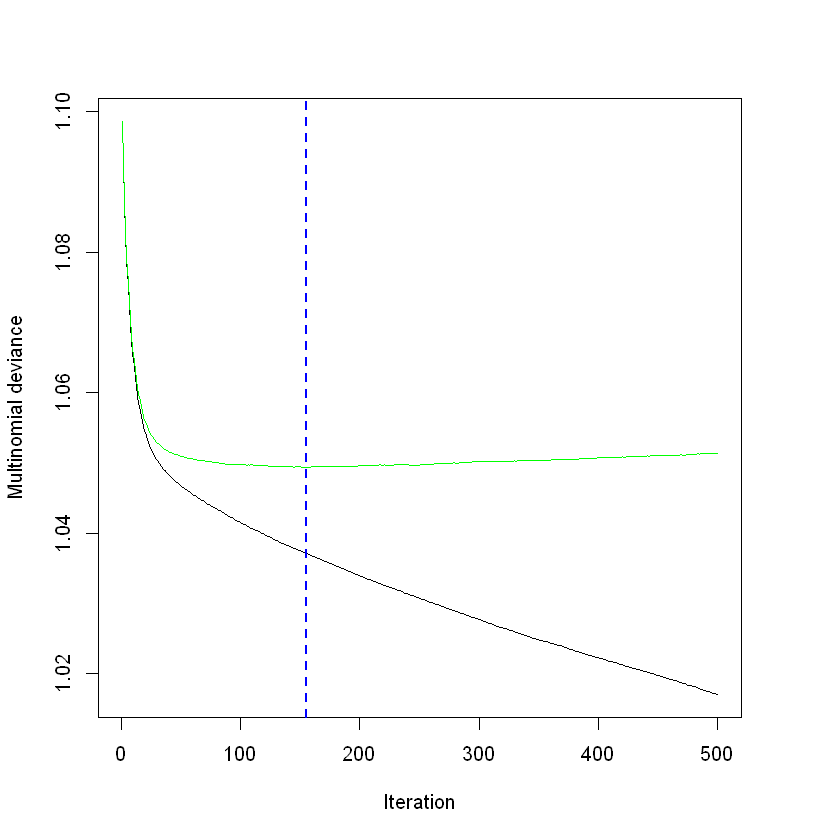

In [429]:

para =gbm.perf( mygbm, method="cv" )
pregbm = predict(mygbm, newdata=test, n.trees = para, type ="response")
p.predBST <- apply(pregbm, 1, which.max)
p.predBST=data.frame(p.predBST)
p.predBST$class = 0


In [430]:
summary(test$logerror_interval)

Accurate Estimate  Overestimate >3% Underestimate >3% 
             5496             10089              7243

In [437]:
p.predBST$class <- replace(p.predBST$class, p.predBST$p.predBST==1, "Accurate Estimate")
p.predBST$class <- replace(p.predBST$class, p.predBST$p.predBST==2, "Overestimate >3%")
p.predBST$class <- replace(p.predBST$class, p.predBST$p.predBST==3, "Underestimate >3%")
confusionMatrix(p.predBST$class, test[,38])

Confusion Matrix and Statistics

                   Reference
Prediction          Accurate Estimate Overestimate >3% Underestimate >3%
  Accurate Estimate               218              214               187
  Overestimate >3%               4798             9106              6221
  Underestimate >3%               480              769               835

Overall Statistics
                                          
               Accuracy : 0.445           
                 95% CI : (0.4386, 0.4515)
    No Information Rate : 0.442           
    P-Value [Acc > NIR] : 0.1771          
                                          
                  Kappa : 0.0346          
 Mcnemar's Test P-Value : <2e-16          

Statistics by Class:

                     Class: Accurate Estimate Class: Overestimate >3%
Sensitivity                           0.03967                  0.9026
Specificity                           0.97686                  0.1350
Pos Pred Value                        0.35218    

In [442]:
target = train$logerror
dtrain = subset(train, select=-c(logerror, logerror_interval, abs_logerror))
dtest = subset(test, select=-c(logerror, logerror_interval, abs_logerror))
dtrain <- xgb.DMatrix(data.matrix(dtrain),label=target, missing=NA)
dtest <-xgb.DMatrix(data.matrix(dtest))

In [443]:
#use crossvalidation to select best shrikage parameter alpha
for (a in seq(0.02, 1, 0.02)){
param = list(booster = "gbtree", eta=0.05, max_depth = 5, min_child_weight = 100, objective = 'reg:linear',
             eval_metirc  =  'rmse', alpha = a)
    print(a)
xgb <- xgb.cv(params = param
                 , data = dtrain
                # , watchlist = list(train = dtrain)
                 , nrounds = 1
                 , verbose = 1
                 , print_every_n = 5
                 , nfold = 5)
}

[1] 0.02
[1]	train-rmse:0.489153+0.000348	test-rmse:0.489160+0.001427 
[1] 0.04
[1]	train-rmse:0.489153+0.000600	test-rmse:0.489159+0.002320 
[1] 0.06
[1]	train-rmse:0.489155+0.000452	test-rmse:0.489162+0.001831 
[1] 0.08
[1]	train-rmse:0.489154+0.000742	test-rmse:0.489155+0.002973 
[1] 0.1
[1]	train-rmse:0.489154+0.000584	test-rmse:0.489159+0.002343 
[1] 0.12
[1]	train-rmse:0.489156+0.000578	test-rmse:0.489160+0.002318 
[1] 0.14
[1]	train-rmse:0.489156+0.000366	test-rmse:0.489161+0.001433 
[1] 0.16
[1]	train-rmse:0.489156+0.000750	test-rmse:0.489153+0.003050 
[1] 0.18
[1]	train-rmse:0.489156+0.000341	test-rmse:0.489161+0.001313 
[1] 0.2
[1]	train-rmse:0.489157+0.000932	test-rmse:0.489149+0.003683 
[1] 0.22
[1]	train-rmse:0.489157+0.000900	test-rmse:0.489153+0.003588 
[1] 0.24
[1]	train-rmse:0.489158+0.000251	test-rmse:0.489166+0.001080 
[1] 0.26
[1]	train-rmse:0.489158+0.000404	test-rmse:0.489161+0.001723 
[1] 0.28
[1]	train-rmse:0.489158+0.000573	test-rmse:0.489160+0.002360 
[1] 0.3


In [444]:
#alpha =0.2
param = list(booster = "gbtree", eta=0.05, max_depth = 5, min_child_weight = 100, objective = 'reg:linear',
             eval_metirc  =  'rmse', alpha = 0.2)
xgb <- xgb.train(params = param
                 , data = dtrain
                # , watchlist = list(train = dtrain)
                 , nrounds = 100
                 , verbose = 1
                 , print_every_n = 5
)
preds <- predict(xgb,dtest)


In [448]:
preds_cat<- cut(preds, breaks=c(-Inf, -0.013,0.012, Inf), 
                                labels=c("Underestimate >3%",
                                        "Accurate Estimate",
                                         "Overestimate >3%"))
confusionMatrix(preds_cat, test[,38])

Warning message in confusionMatrix.default(preds_cat, test[, 38]):
"Levels are not in the same order for reference and data. Refactoring data to match."

Confusion Matrix and Statistics

                   Reference
Prediction          Accurate Estimate Overestimate >3% Underestimate >3%
  Accurate Estimate              1005             1594              1536
  Overestimate >3%               4483             8466              5675
  Underestimate >3%                 8               29                32

Overall Statistics
                                          
               Accuracy : 0.4163          
                 95% CI : (0.4099, 0.4227)
    No Information Rate : 0.442           
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0187          
 Mcnemar's Test P-Value : <2e-16          

Statistics by Class:

                     Class: Accurate Estimate Class: Overestimate >3%
Sensitivity                           0.18286                  0.8391
Specificity                           0.81941                  0.2026
Pos Pred Value                        0.24305    